# NE 630 - Lesson 5

## Getting Cross-Section Data

All of the "raw" data we need lives in the ENDF/B format and is [distributed](https://www.nndc.bnl.gov/endf-b8.0/download.html) by Brookhaven National Laboratory (BNL).

However, we need processed data; an option is BNL's [Sigma](https://www.nndc.bnl.gov/sigma/).  To get data for a nuclide and reaction:

  1. Click on the element (on the periodic table)
  2. Click on the mass number (far right-hand side)
  3. Find the cross section and click `Plot`
  4. Click on `View evaluated data`
  5. Click on `Text`
  6. Save as whatever you want to call it!

In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
files = glob.glob("./cross_section_data/*.txt")

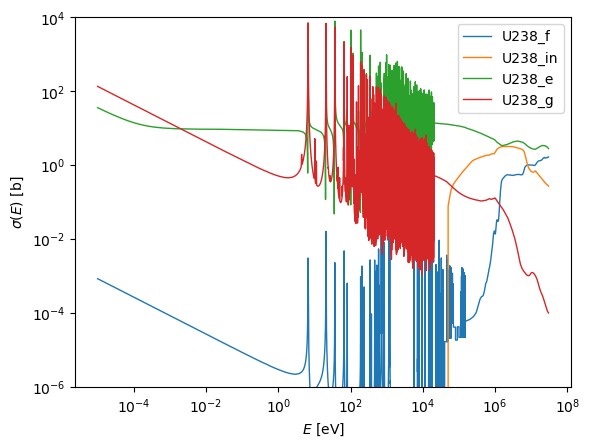

In [9]:
for file in files:
    if not "U238" in file:  # choose which nuclide to plot
       continue
    if "_t" in file:     # skip the total
        continue
    label = file.replace("./cross_section_data/","").replace(".txt", "")
    E, sigma = np.loadtxt(file, unpack=True, delimiter=",", skiprows=1)
    plt.loglog(E, sigma, label=label, linewidth=1)

#v = np.sqrt(E) # ignore constants
#plt.loglog(E, 1/v, 'k--')

plt.ylim(1e-6, 1e4)
plt.legend()
plt.xlabel('$E$ [eV]')
plt.ylabel('$\sigma(E)$ [b]');

In [ ]:
# High-energy limit of sigma_t [b]
A = 16 # mass number
R = 1.2e-13*A**(1/3) # nuclear radius [cm]
2*np.pi*R**2 * 1e24 # sigma [b]

In [ ]:
2.86e-11/2/np.pi